8-2 장단기 메모리(Long Short-Term Memory, LSTM)

1. 바닐라 RNN의 한계\
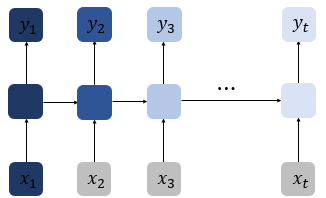

바닐라 RNN은 출력 결과가 이전의 계산 겨과에 의존한다. 하지만 바닐라 RNN은 비교적 짧은 시퀀스에 대해서만 효과를 보이는 단점이 존재. \
바닐라 RNN의 시점(time step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생한다. \
시점이 충분히 길어지게되면 초기 정보에 대한 영향력은 거의 의미가 없을 수도 있다. \
이를 장기 의존성 문제(the problem of Long-Term Dependencies)라고 한다.

2. 바닐라 RNN 내부 열어보기\
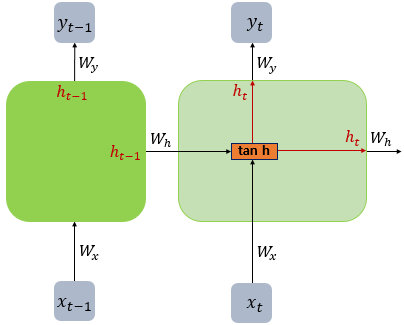\
(편향 b를 그리고 싶다면 X(t)옆에 tanh로 향하는 또 하나의 입력선을 그리면 된다.)

h(t) = tanh(W(x)X(t)+W(h)h(t-1)+b) \
\
바닐라 RNN은 X(t)와 h(t-1)이라는 두 개의 입력이 각각의 가중치와 곱해져서 메모리 셀의 입력이 된다. 이를 하이퍼볼릭탄젠트 함수의 입력으로\
사용하고 이 값은 은닉층의 출력인 은닉 상태가 된다.

3. LSTM(Long Short-Term Memory)\
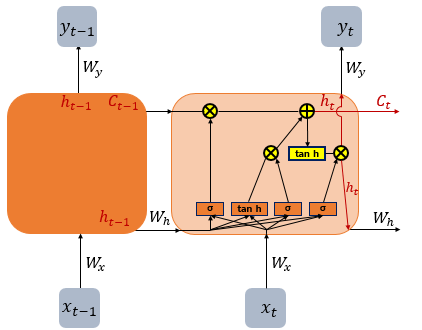\
(t시점의 셀 상태를 C(t)로 표현하고 있다.)

LSTM은 은닉층의 메모리 셀에 입력 게이트, 삭제 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정한다. \
LSTM은 은닉 상태를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며 셀 상태(cell state)라는 값을 추가하였다. \
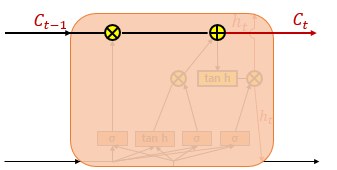\
은닉 상태의 값과 셀 상태의 값을 구하기 위해서 새로 추가 된 3개의 게이트를 사용한다. 이 3개의 게이트에는 공통적으로 시그모이드 함수가 존재. \
(이하의 식에서 시그마는 시그모이드 함수를 의미)

(1) 입력 게이트 \
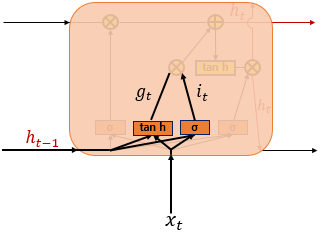\
i(t) = 시그마(W(xi)X(t) + W(hi)h(t-1) + b(i))\
g(t) = tanh(W(xg)X(t) + W(hg)h(t-1) + b(g))\
입력 게이트는 현재 정보를 기억하기위한 게이트다. \
시그모이드 함수를 지나 0과 1사이의 값을 가지는 i(t)와 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값을 가지는 g(t) \
위 두개의 값을 가지고 선택된 기억할 정보의 양을 정한다.

(2) 삭제 게이트\
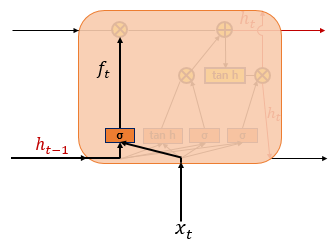\
f(t) = 시그마(W(x)X(t) + W(hf)h(t-1) + b(f))\
삭제 게이트는 기억을 삭제하기 위한 게이트이다. \
시그모이드 함수를 지나 0과 1사이의 값을 가지게 되는데, 이 값이 곧 삭제 과정을 거친 정보의 양이다.\
0에 가까울수록 정보가 많이 삭제된 것이고 1에 가까울수록 정보를 온전히 기억한 것이다.

(3) 셀 상태(아다마르의 곱 - H로 표현)\
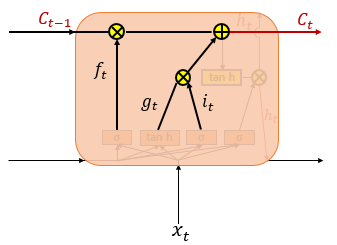
\
C(t) = (f(t) H C(t-1) + i(t) H g(t)) , 삭제 게이트에서 일부 기억을 잃은 상태이다.\
입력 게이트에서 구한 i(t)와 g(t) 이 두개의 값에 대해서 원소별 곱(entrywise product=아다마르 곱)을 진행한다.\
같은 크기의 두 행렬이 있을 때 같은 위치의 성분끼리 곱하는 것을 말한다.\
\
ex) A = (a11,a12,a21,a22) , B =(b11,b12,b21,b22) 일때 A H(Hadamar) B = (a11b11,a12b12,a21b21,a22b22)\
\
입력 게이트에서 선택된 기억을 삭제 게이트의 결과값(f(t))과 더한다. 이 값을 현재 시점 t의 셀 상태라고 하며, 이 값은 다음 t+1 시점의 LSTM 셀로 넘겨진다.\
즉, 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미하고, 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정한다.

(4) 출력 게이트와 은닉 상태\
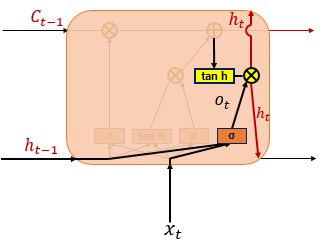\
O(t) = 시그마(W(xo)X(t) + W(ho)h(t-1) + b(o))\
h(t) = O(t) H tanh(C(t))\
O(t)의 값은 현재 시점 t의 은닉 상태를 결정하는 일에 쓰이게 된다. 셀 상태의 값(C(t))이 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값이 되고\
해당 값은 출력 게이트값과 연산이 되면서, 값이 걸러지는 효과가 발생하여 은닉 상태가 된다.

출력 게이트를 나중에 한번 더 확인해봐야 할듯.